In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

pandas for data manipulation

matplotlib.pyplot for plotting graphs

adfuller for stationarity testing

plot_acf and plot_pacf for lag analysis

ARIMA from statsmodels to build the ARIMA mode

In [3]:

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
ts = data['Passengers']

This dataset contains monthly air passenger counts from 1949 to 1960.   Converts the 'Month' column into a proper datetime format.

This helps with time-based indexing and plotting.
Sets the 'Month' column as the index of the DataFrame.

This makes it a proper time series with a datetime index.
Selects the 'Passengers' column as the time series data (ts)that you’ll work with.


In [4]:
# 1. Check stationarity
result = adfuller(ts)
print("ADF p-value:", result[1])  # If > 0.05 => not stationary

ADF p-value: 0.991880243437641


Performs the Augmented Dickey-Fuller (ADF) test to check for stationarity.

If the p-value > 0.05, the data is not stationary and needs differencing.

In [5]:
# 2. Make stationary (if needed)
ts_diff = ts.diff().dropna()


Applies first-order differencing: current - previous

dropna() removes the first NaN that results from differencing.

This step is part of the "I" (Integrated) in ARIMA → making the data stationary.

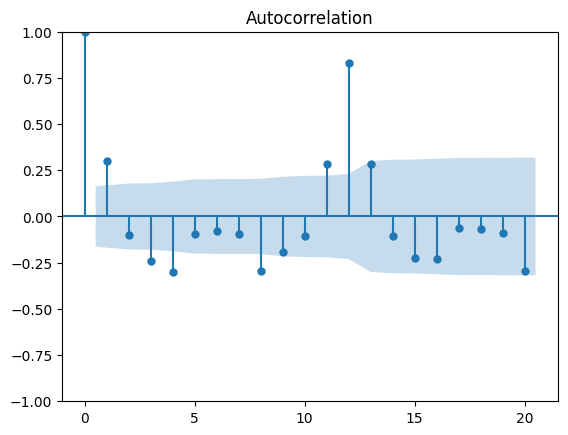

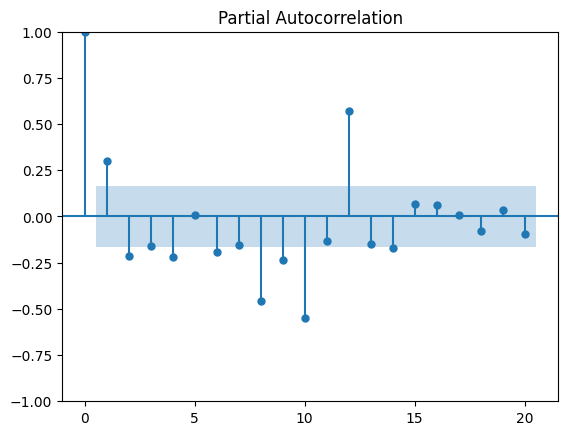

In [6]:

# 3. Plot ACF & PACF
plot_acf(ts_diff, lags=20)
plot_pacf(ts_diff, lags=20)
plt.show()

Plots ACF (Autocorrelation Function) and PACF (Partial ACF) for up to 20 lags.

These plots help you determine:

q (MA terms) from ACF

p (AR terms) from PACF

In [7]:

# 4. Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Creates an ARIMA model with:

p=1 → one autoregressive term

d=1 → first differencing

q=1 → one moving average term

.fit() trains the model on the data.

In [8]:
# 5. Summary & forecast
print(model_fit.summary())

forecast = model_fit.forecast(steps=12)
print("Next 12 months forecast:")
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 09 May 2025   AIC                           1394.683
Time:                        17:00:01   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

Prints a detailed summary of the model parameters, statistics, and fit quality.
Forecasts the next 12 months of data.

steps=12 means we want 12 time steps ahead.

Prints the predicted values.

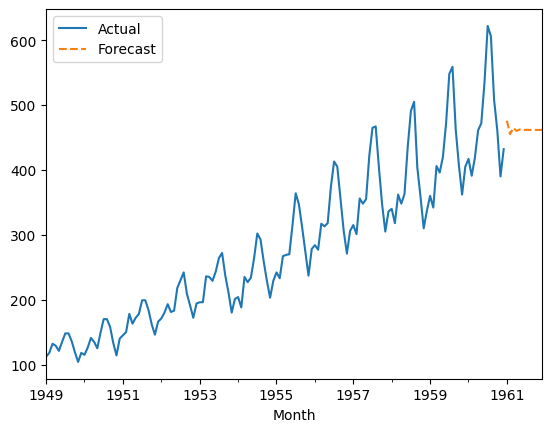

In [9]:
# Plot
ts.plot(label='Actual')
forecast.plot(label='Forecast', style='--')
plt.legend()
plt.show()

Plots:

The original data (ts) in solid line.

The forecast (forecast) in dashed line.

Adds a legend and displays the plot to visualize prediction vs. history.

